# Face Detection In Python Using OpenCV

A computer program that decides whether an image is positive image (face image) or negative image (non-face image) is called a classifier. A classifier is trained on a hundreds of thousands of face and non-face images to learn to classify a new image as face or non-face image correctly. `OpenCV` provides us with two pre-trained (already trained and ready to be used for detection) classifiers:

1. Haar Classifier
2. LBP Classifier

**Both of these classifiers process images in grayscales** as we don't need color information to decide if image has a face or not. As these are pretrained in OpenCV so their learned knwoledge files also comes bundled with OpenCV `opencv/data/`. To run a classifier we need to load the knowledge files first as without that knowledge a classifier is nothing but just like a newly born baby, right? Each file starts with the name of classifier it belongs to. For example, `haarcascade_frontalface_alt.xml` as you might have guessed belongs to Haar cascade classifier. 

### Haar Classifier

It is a machine learning based approach where a cascade function is trained from a lot of positive (images with face) and negative images (images without face). The algorithm is proposed by Paul Viola and Michael Jones.

The algorithm has four stages:

1. Haar Feature Selection: Haar features are calculated in the subsections of the input image. The difference between the sum of pixel intensities of adjacent rectangular regions is calculated to differentiate the subsections of the image. A large number of haar-like features are required for getting facial features.
2. Creating an Integral Image: Too much computation will be done when operations are performed on all pixels, so an integral image is used that reduce the computation to only four pixels. This makes the algorithm quite fast.
3. Adaboost: All the computed features are not relevant for the classification purpose. Adaboost is used to classify the relevant features.
4. Cascading Classifiers: Now we can use the relevant features to classify a face from a non-face but algorithm provides another improvement using the concept of cascades of classifiers. Every region of the image is not a facial region so it is not useful to apply all the features on all the regions of the image. Instead of using all the features at a time, group the features into different stages of the classifier.Apply each stage one-by-one to find a facial region. If on any stage the classifier fails, that region will be discarded from further iterations. Only the facial region will pass all the stages of the classifier.

# LBP Cascade Classifier
LBP is a texture descriptor and face is composed of micro texture patterns. So LBP features are extracted to form a feature vector to classify a face from a non-face. Following are the basic steps of LBP Cascade classifier algorithm:

1. LBP Labelling: A label as a string of binary numbers is assigned to each pixel of an image.
2. Feature Vector: Image is divided into sub-regions and for each sub-region, a histogram of labels is constructed. Then, a feature vector is formed by concatenating the sub-regions histograms into a large histogram.
3. AdaBoost Learning: Strong classifier is constructed using gentle AdaBoost to remove redundant information from feature vector.
4. Cascade of Classifier: The cascades of classifiers are formed from the features obtained by the gentle AdaBoost algorithm. Sub-regions of the image is evaluated starting from simpler classifier to strong classifier. If on any stage classifier fails, that region will be discarded from further iterations. Only the facial region will pass all the stages of the classifier.

## 2. Coding Face Detection Using OpenCV

### Dependencies
1. OpenCV 3.2.0
2. Python v3.5
3. Matplotlib 2.0

### Importing Required Liberaries

Let's import the required libraries first. As names of libraries are self-descriptive so I am sure you will understand them. 

In [1]:
#import required libraries 
#import OpenCV library
import cv2
#import matplotlib library
import matplotlib.pyplot as plt
#importing time library for speed comparisons of both classifiers
import time 
%matplotlib inline

When you load an image using OpenCV it loads that image into BGR color space by default. To show the colored image using `matplotlib` we have to convert it to RGB space. Following is a helper function to do exactly that. 

In [2]:
def convertToRGB(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

**`cv2.cvtColor`** is an OpenCV function to convert images to different color spaces. It takes an image to convert and a color space code (like cv2.COLOR_BGR2RGB) to convert image to and returns the converted image. 

Now that we are all setup, let's start coding our first face detector `Haar`. 

### Code - Haar Cascade Classifier

First let's start with a simple task, **load our input image, convert it to grayscale mode and then display it**. 
 For reading image, I have used OpenCV's function built in function **`cv2.imread(img_path)`** by passing our image path as an input parameter. 

In [3]:
#load test iamge
test1 = cv2.imread('D:/Face-Detection-OpenCV/data/test1.jpg')

#convert the test image to gray image as opencv face detector expects gray images
gray_img = cv2.cvtColor(test1, cv2.COLOR_BGR2GRAY)

Now let's display our loaded image. To display our image, I am going to use **plt.imshow(img, cmap)** function of `matplotlib`. 

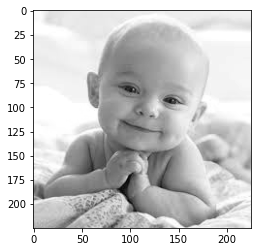

In [4]:
#if you have matplotlib installed then 
plt.imshow(gray_img, cmap='gray')


In [5]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('D:/Face-Detection-OpenCV/data/haarcascade_frontalface_alt.xml')

Now how do we detect face from image using our `CascadeClassifier` we just loaded? Well OpenCV's CascadedClassifier has made it simple for us as it comes with a simple function **`detectMultiScale`**. This function detects the faces in a given test image and following are details of its options/arugments.

* **`detectMultiScale(image, scaleFactor, minNeighbors)`:** A general function that detects objects. Since we are calling it on the face cascade, that’s what it detects. If faces are found, this function returns a list of positions of detected faces as Rect(x,y,w,h). If no faces are detected then it returns `None`.

* **`image`:** The first option is the **gray scale image**. Again, the image should be **_gray scale_**.

* **`scaleFactor`:** Since some faces may be closer to the camera, they would appear bigger than those faces in the back. The scale factor compensates for this.

* **`minNeighbors`:** The detection algorithm uses a moving window to detect objects. This parameter defines how many objects are detected near the current one before it declares the face found.  



In [6]:
#let's detect multiscale (some images may be closer to camera than others) images
faces = haar_face_cascade.detectMultiScale(gray_img, scaleFactor=1.1, minNeighbors=5);

#print the number of faces found
print('Faces found: ', len(faces))

Faces found:  1


Ohooo! We detected our face.

Next, let's loop over the list of faces (rectangles) it returned and draw those rectangles using built in OpenCV **`rectangle`** function on our original colored image to see if it detected the right faces. 

In [7]:
#go over list of faces and draw them as rectangles on original colored img
for (x, y, w, h) in faces:
    cv2.rectangle(test1, (x, y), (x+w, y+h), (0, 255, 0), 2)

Display the original image to see rectangles drawn and verify that detected faces are really faces and not false positives. 

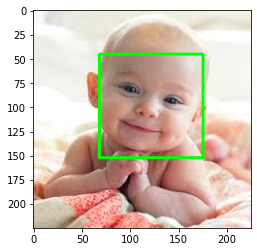

In [8]:
#conver image to RGB and show image
plt.imshow(convertToRGB(test1))

We did it! But our code is scattered and to try it on other test images we have to used the same code again and again so why not group our code into a function so that it is reusable? 

### Grouping Code into a Function

It would be easy and reusable if we grouped our face detection code into a function so let's make a function out of our code.

In [9]:
def detect_faces(f_cascade, colored_img, scaleFactor = 1.1):
    #just making a copy of image passed, so that passed image is not changed
    img_copy = colored_img.copy()
    
    #convert the test image to gray image as opencv face detector expects gray images
    gray = cv2.cvtColor(img_copy, cv2.COLOR_BGR2GRAY)
    
    #let's detect multiscale (some images may be closer to camera than others) images
    faces = f_cascade.detectMultiScale(gray, scaleFactor=scaleFactor, minNeighbors=5);
    
    #go over list of faces and draw them as rectangles on original colored img
    for (x, y, w, h) in faces:
        cv2.rectangle(img_copy, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
    return img_copy

Our **`detect_faces`** function takes 3 input parameters, first is our loaded `CascadeClassifier`, second is image we want to detect faces on and third is `scaleFactor` (Remember it from details of `detectMultiScale` function?). 

Inside function, first I make a copy `img_copy` of the passed image so that we do all operations on a copy and not the original image. Then I **convert the copied image `img_copy` to gray scale** as our face detector expects a gray scale image. After that I call the **`detectMultiScale`** function of our `CascadeClassifier` to return list of detected faces ( which is list of rectangles Rect(x, y, w, h)). 

Once we have the list of detected faces, I loop over them and **draw a rectangle on the copy of image `img_copy`**. At the end I return the modified copy of image. So that code is basically same as before, it is just grouped inside a function for reusability.

Now let's try this function on another test image. 

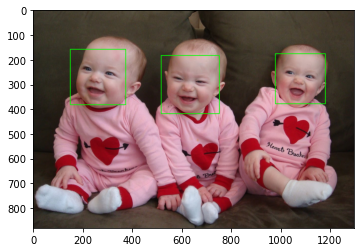

In [10]:
#load another image
test2 = cv2.imread('D:\Face-Detection-OpenCV/data/test3.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

### Dealing with false positives 

Let's try our face detector on another test image. 

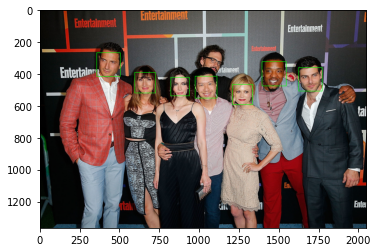

In [11]:
#load another image
test2 = cv2.imread('D:\Face-Detection-OpenCV/data/test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

Well, we got two false positives. What went wrong there? Remember, some faces may be closer to the camera and they would appear bigger than those faces in the back. The scale factor compensates for this so can tweak that parameter. For example, `scaleFactor=1.2` improved the results.

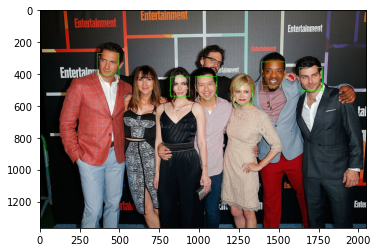

In [12]:
#load another image
test2 = cv2.imread('D:\Face-Detection-OpenCV/data/test4.jpg')

#call our function to detect faces
faces_detected_img = detect_faces(haar_face_cascade, test2, scaleFactor=1.2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

So you have to tune these parameters according to information you have about your data.

### Code - LBP Cascade Classifier

XML training files for LBP cascade are stored in `opencv/data/lbpcascades/` folder and their names starts with (as you might have guessed, `lbpcascade`). 

From coding perspective you don't have to change anything in our face detection code except, instead of loading the `Haar` classifier training file you have to load the `LBP` training file and rest of the code is exactly same. That's sounds really easy, right? Well OpenCV has made it easy for! You can try as many detectors (eye detector, smile detector etc.) as you want, without changing much of the code.

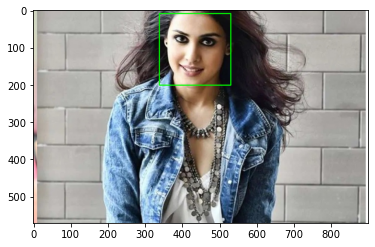

In [13]:
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('D:/Face-Detection-OpenCV/data/lbpcascade_frontalface.xml')

#load test image
test2 = cv2.imread('D:/Face-Detection-OpenCV/data/test2.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

So the code is exactly same, I load up our `CascadeClassifier` this time with **`LBP training file`**. I read a test image and call our **detect_faces** function which returns an image with faces drawn on it. Then I display the image.

Let's try it on another test image. 

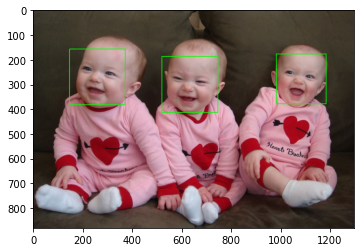

In [14]:
#load test image
test2 = cv2.imread('D:/Face-Detection-OpenCV/data/test3.jpg')
#call our function to detect faces
faces_detected_img = detect_faces(lbp_face_cascade, test2)

#conver image to RGB and show image
plt.imshow(convertToRGB(faces_detected_img))

## 3. Haar and LBP Results Analysis

I have shown a table comparing the two classifiers but you may not believe so why not I show you the results on real images? Let's do it then! We will run both `Haar` and `LBP` on **two test images to see accuracy and time delay of each**.

In [15]:
#load cascade classifier training file for haarcascade
haar_face_cascade = cv2.CascadeClassifier('D:/Face-Detection-OpenCV/data/haarcascade_frontalface_alt.xml')
#load cascade classifier training file for lbpcascade
lbp_face_cascade = cv2.CascadeClassifier('D:/Face-Detection-OpenCV/data/lbpcascade_frontalface.xml')

#load test image1
test1 = cv2.imread('D:/Face-Detection-OpenCV/data/test5.jpg')
#load test image2
test2 = cv2.imread('D:/Face-Detection-OpenCV/data/test6.jpg')

I have loaded both **Haar** and **LBP** classifiers and two test images **test1** and **test2**.

### Test-1

Let's first try both classifiers on test1 image.

In [16]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

I have used Python library function **time.time()** to note time. So before detecting faces on our test image, I note the start time **t1** and then I call our function **detect_faces** and then again I note end time **t2**. The difference between start time t1 and end time t2, **_dt1_** is what we are interested in **as it is time taken by our face detector to detect faces**.

Let's do the same for **LBP** classifier.

In [19]:
#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test1)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

Now that we have the face detected images and times taken by our both face detectors, let's display the results and see which one performs better.

I am going to use `matplotlib` function **[subplots(rows, cols, figsize)](https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot)** to display our results side by side. I am displaying the time difference as a title of each subplot (image window). 

Let's see the results then! 

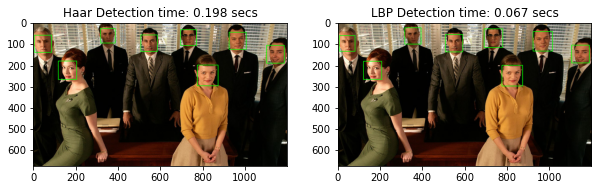

In [20]:
#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)

- **Accuracy:** Both `Haar` and `LBP` detected faces successfully.
- **Speed:** `LBP` was faster than `Haar`.

### Test-2 

Let's see the results for test2 image. The code is exactly same as for test1.

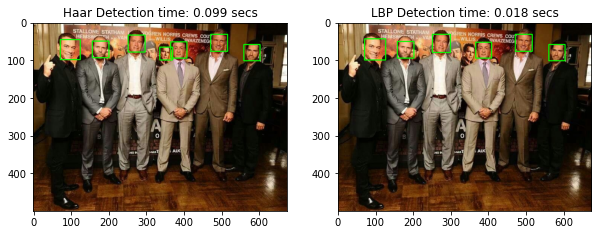

In [21]:
#------------HAAR-----------
#note time before detection
t1 = time.time()

#call our function to detect faces
haar_detected_img = detect_faces(haar_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt1 = t2 - t1
#print the time differene

#------------LBP-----------
#note time before detection
t1 = time.time()

lbp_detected_img = detect_faces(lbp_face_cascade, test2)

#note time after detection
t2 = time.time()
#calculate time difference
dt2 = t2 - t1
#print the time differene

#----------Let's do some fancy drawing-------------
#create a figure of 2 plots (one for Haar and one for LBP)
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

#show Haar image
ax1.set_title('Haar Detection time: ' + str(round(dt1, 3)) + ' secs')
ax1.imshow(convertToRGB(haar_detected_img))

#show LBP image
ax2.set_title('LBP Detection time: ' + str(round(dt2, 3)) + ' secs')
ax2.imshow(convertToRGB(lbp_detected_img))

#show images
# plt.imshow(faces_detected_img)

- **Accuracy:** `Haar` detected more faces and than `LBP`. 
- **Speed:** `LBP` was significantly faster than `Haar`.

## End Notes

As you can see **`LBP` is significantly faster than `Haar`** and not that much behind in accuracy so depending on the needs of your application you can use any of the above-mentioned face detection algorithms. 